In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fractions import Fraction
import phylogenetic_tree as pt

# Reload functions
%load_ext autoreload
%autoreload 2


c:\Users\bertr\miniconda3\envs\thesis\lib\site-packages\ete3-3.1.2-py3.7.egg\ete3\evol\parser\codemlparser.py:221: SyntaxWarning: "is" with a literal. Did you mean "=="?
c:\Users\bertr\miniconda3\envs\thesis\lib\site-packages\ete3-3.1.2-py3.7.egg\ete3\evol\parser\codemlparser.py:221: SyntaxWarning: "is" with a literal. Did you mean "=="?


Aim of this notebook is to obtain graphical representations of the following function to add to the report:

$$e^{\frac{1}{z^a}} - e^1$$

where z is a given value and a is a defined parameter.

In [4]:
# Define the function
def measure_to_dist(z, a):
    return np.exp(1/z**a) - np.exp(1)

In [5]:
# Define a function to represent the function wrt the parameter a
def plot_measure_to_dist(a, ax):
    # Create the x and y axis
    x = np.linspace(0.01, 1, 100)
    y = measure_to_dist(x, a)

    # Set y-axis
    ax.set_ylim(0, 30)

    # Set x-axis
    ax.set_xlim(0, 1)

    ax.plot(x, y)
    ax.set_xlabel('Similarity measure')
    ax.set_ylabel('Distance')

    # Convert a to a fraction
    a_fraction = Fraction(a).limit_denominator()

    # Use the fraction representation in the title
    ax.set_title('Similarity to distance with a = ' + str(a_fraction))

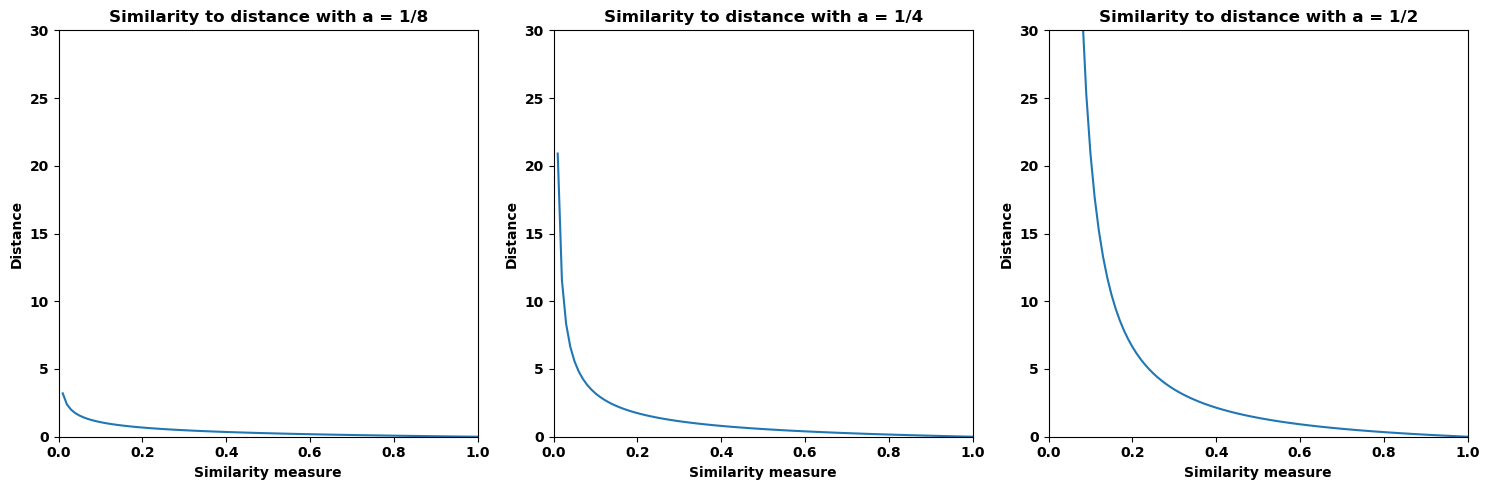

In [6]:
a = [1/8, 1/4, 1/2]

# Create a figure with three subplots
fig, axes = plt.subplots(1, len(a), figsize=(15, 5))

for i in range(len(a)):
    plot_measure_to_dist(a[i], axes[i])

plt.tight_layout()
plt.show()

In [7]:
# Find max value of the function for z between 0 and 1
z = np.linspace(0, 1, 100)
y = measure_to_dist(z, 1/4)
print('Max value of the function: ', np.max(y))

# Min value
print('Min value of the function: ', np.min(y))

Max value of the function:  inf
Min value of the function:  0.0


C:\Users\bertr\AppData\Local\Temp\ipykernel_18156\4167054630.py:3: RuntimeWarning: divide by zero encountered in divide
  return np.exp(1/z**a) - np.exp(1)


# Visualise cluster of results

In this part of the notebook, we will visualise the results of the clustering algorithm. For doing so, a species will be taken into account and the results of the clustering algorithm will be plotted in a 2D plot versus its original similarity measure results. This is done to visualise its clusters, which later on will be represented into the tree.

In [8]:
# Read the similarity matrix results
input_folder_path = '../Data/Intermediate/metric'
input_file_path = input_folder_path + '/metric_matrix_strict.csv'

In [9]:
scale = 1/4

# Read and transform the similarity matrix
species, lower_triangular_list_of_lists = pt.read_measure(input_folder_path, mode='strict', scale=scale)

In [10]:
'''# Get the lower triangular matrix values for the objective species
obj_species = 'Rhesus Macaque'

# Get the index of the objective species
obj_species_index = species.index(obj_species)

# Get the values of the objective species
obj_species_values = lower_triangular_list_of_lists[obj_species_index]

# Get the values of the objective species without the diagonal
obj_species_values_without_diagonal = obj_species_values[1:]

# Get the values of the objective species
obj_species_values_original = sim_measure[obj_species].to_list()'''

NameError: name 'sim_measure' is not defined

In [44]:
# Get the values of the objective species of the original similarity measure
# Load the results
sim_measure = pd.read_csv(input_file_path)

In [45]:
# Remove negative values
sim_measure = sim_measure[sim_measure > 0]

In [46]:
# Get only the objective species
sim_measure = sim_measure[[obj_species]]

# Remove nulls
sim_measure = sim_measure.dropna()

In [47]:
# Apply the transformation function to sim_measure
dist = sim_measure.applymap(lambda x: measure_to_dist(x, scale))

Text(0.5, 1.0, 'Similarity measure vs distance for Rhesus Macaque')

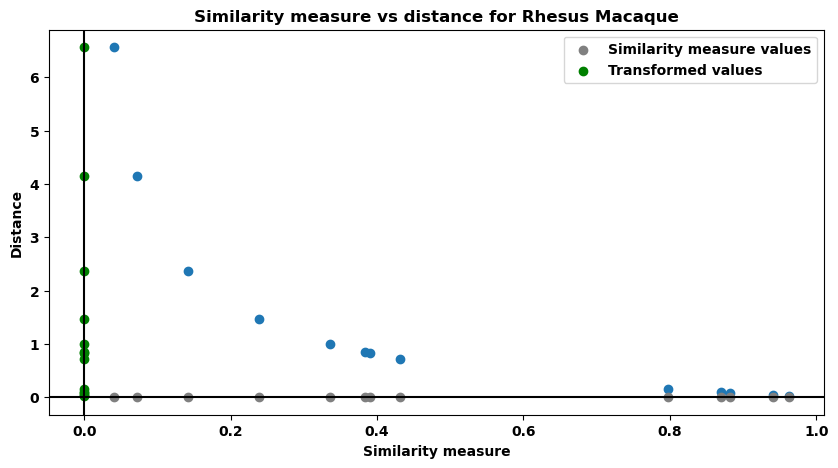

In [48]:
# Plot similarity measure vs distance
# x-axis: similarity measure
# y-axis: distance
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

# Set y-axis
# min = 0, but no max
#ax.set_ylim(bottom=-1, top=8)

# Set x-axis
#ax.set_xlim(-1, 8)

# Draw the axis lines
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

# Plot the similarity measure vs distance
ax.scatter(sim_measure, dist)

# Set the labels
ax.set_xlabel('Similarity measure')
ax.set_ylabel('Distance')

# Add other species names
'''
for i in range(len(species)):
    if species[i] != obj_species:
        ax.annotate(species[i], (sim_measure.iloc[i], dist.iloc[i]))
'''

# Represent as dots in the plot the original values of the similarity measure
ax.scatter(sim_measure, np.zeros(len(sim_measure)), color='grey', label='Similarity measure values')

# Represent as dots the distance values of the objective species in the y-axis
ax.scatter(np.zeros(len(sim_measure)), dist, color='green', label='Transformed values')

# Introduce a legend
ax.legend()

# Add the objective species name in the title
ax.set_title('Similarity measure vs distance for ' + obj_species)